# Training Models

having a good understanding of how things work can help you quickly
home in on the appropriate model, the right training algorithm to use, and a good set
of hyperparameters for your task. Understanding what’s under the hood will also help
you debug issues and perform error analysis more efficiently. Lastly, most of the topics
discussed in this chapter will be essential in understanding, building, and training
neural networks

In [1]:
import numpy as np

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [4]:
import matplotlib.pyplot as plt

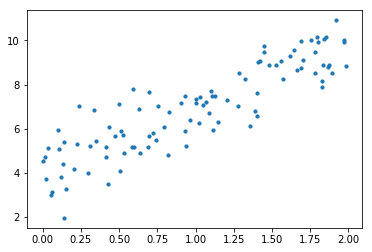

In [15]:
plt.scatter(X, y, s=10)

In [16]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [17]:
theta_best

array([[4.04321335],
       [2.88926407]])

In [18]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.04321335],
       [9.82174149]])

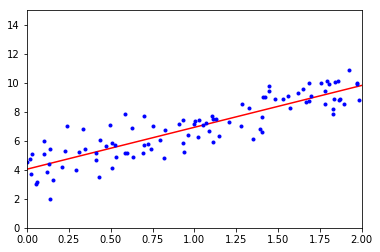

In [19]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [25]:
# Batch Gradient Descent
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[4.04321335],
       [2.88926407]])

In [24]:
# Stochastic Gradient Descent
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
theta

array([[4.07456829],
       [2.87372127]])

### Polynomial Regression

In [26]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

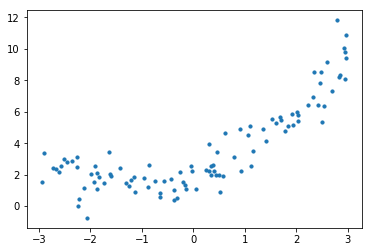

In [27]:
plt.scatter(X, y, s=10)

In [29]:
from sklearn.preprocessing import PolynomialFeatures
X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
print('X[0]: {}'.format(X[0]))
print('X_poly[0]: {}'.format(X_poly[0]))

X[0]: [2.02822279]
X_poly[0]: [2.02822279 4.11368767]


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lin_reg = LinearRegression().fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.93238412]), array([[1.08667841, 0.48574001]]))

### Learning Curves

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [33]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), label='train errors')
    plt.plot(np.sqrt(val_errors), label='val errors')
    plt.legend()
    plt.show()

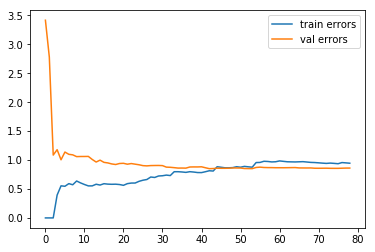

In [34]:
plot_learning_curves(LinearRegression(), X_poly, y)

### Regularized Linear Models

For a linear model, regularization is typically achieved by constraining the weights of
the model

#### Ridge Regression

It is important to scale the data (e.g., using a StandardScaler)
before performing Ridge Regression, as it is sensitive to the scale of
the input features. This is true of most regularized models.

In [35]:
from sklearn.linear_model import Ridge

In [37]:
Ridge(alpha=1).fit(X, y).predict([[1.5]])

array([[5.2715014]])

#### Lasso

In [38]:
from sklearn.linear_model import Lasso

In [39]:
Lasso(alpha=0.1).fit(X, y).predict([[1.5]])

array([5.23345513])

#### Elastic Net

In [40]:
from sklearn.linear_model import ElasticNet

In [42]:
ElasticNet(alpha=0.1, l1_ratio=0.5).fit(X, y).predict([[1.5]])

array([5.22961735])

### Logistic Regression

### Softmax Regression